In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import scipy
import math
import pandas_ta as ta
from directional_change import directional_change, get_extremes
import os

In [6]:
data = pd.read_csv(os.path.join(os.path.abspath(''), '..', '..','data', 'BTCUSDT-1m-2024-01.csv'), usecols = [0,1,2,3,4], names = ["date", "open", "high", "low","close"])
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')
plt.style.use('dark_background')

In [7]:
data

,open,high,low,close
date,,,,
55969-09-28 00:00:00,42283.58,42298.62,42261.02,42298.61
55969-09-28 16:40:00,42298.62,42320.00,42298.61,42320.00
55969-09-29 09:20:00,42319.99,42331.54,42319.99,42325.50
55969-09-30 02:00:00,42325.50,42368.00,42325.49,42367.99
55969-09-30 18:40:00,42368.00,42397.23,42367.99,42397.23
...,...,...,...,...
56054-08-09 12:40:00,42611.31,42614.98,42607.91,42614.98
56054-08-10 05:20:00,42614.98,42617.80,42610.55,42617.80
56054-08-10 22:00:00,42617.80,42617.80,42617.79,42617.80


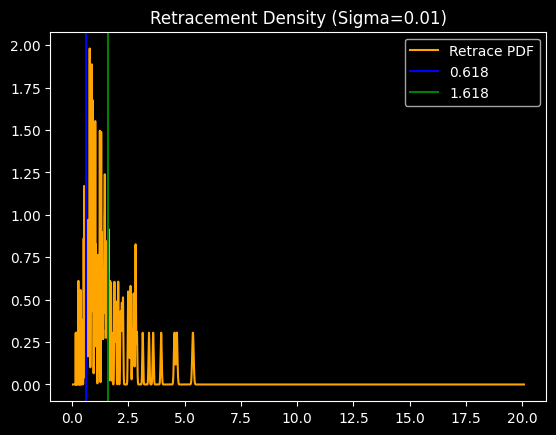

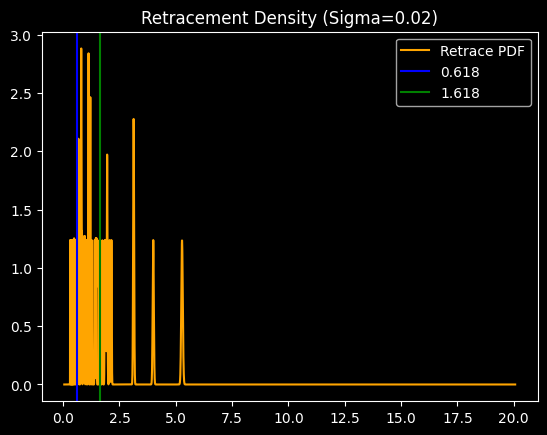

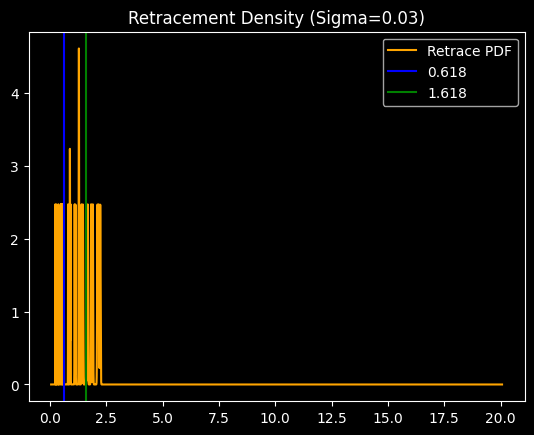

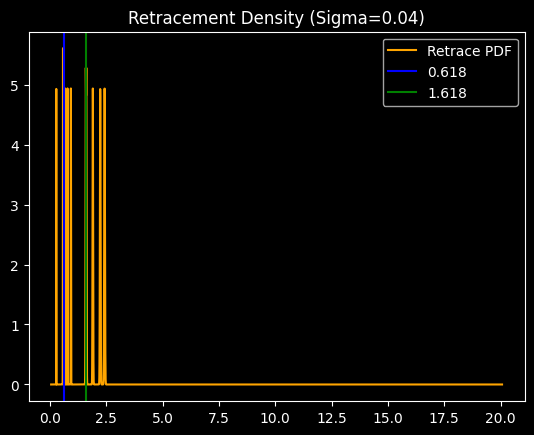

In [8]:
for sigma in [0.01, 0.02, 0.03, 0.04]:
    extremes = get_extremes(data, sigma)

    # Find segment heights, retracement ratios
    extremes['seg_height'] = (extremes['ext_p'] - extremes['ext_p'].shift(1)).abs()
    extremes['retrace_ratio'] = extremes['seg_height'] / extremes['seg_height'].shift(1) 
    extremes['log_retrace_ratio'] = np.log(extremes['retrace_ratio']) 

    # Find kernal of log retrace ratios
    kernal = scipy.stats.gaussian_kde(extremes['log_retrace_ratio'].dropna(), bw_method=0.01)
    retrace_range = np.arange(-3, 3, 0.001)
    retrace_pdf = kernal(retrace_range)
    retrace_pdf = pd.Series(retrace_pdf, index=np.exp(retrace_range))
    retrace_pdf.plot(color='orange', label='Retrace PDF')
    plt.axvline(0.618, label='0.618', color='blue')
    plt.axvline(1.618, label='1.618', color='green')
    plt.title("Retracement Density (Sigma=" + str(sigma) + ")")
    plt.legend()
    plt.show()